In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV

<div style="background-color: #F6BDD1; color:white; padding: 10px;">
    <h1>I. Régression par les plus prohces voisins </h1>
</div>

<div style="background-color: #C7F3A5; padding: 10px;">
    <h>
        La méthode de classification des <b>k plus proches voisins</b> prend en compte la proximité spatiale des données et attribue une classe en fonction de la majorité des classes parmi ses voisins les plus proches. Nous souhaitons illustrer la consistance de l’utilisation des plus proches voisins pour un <b>problème de régression</b>. 
        <br></br>
    Un classificateur $(\hat{c}_n)_n$ est dit <b>consistant</b> si 
    $\mathbb{E}[|c^*(X) - \hat{c}_n(X)|]$ converge presque-sûrement vers $0$, $c^*$ étant la vraie fonction de régression et $\hat{c}_n$ l'estimation de cette fonction de régression. Autrement dit,
    $$\hat{c}_n(X) \xrightarrow{L_1} c^*(X)$$
    <br></br>
    L'estimateur de régression non paramètrqiue est défini comme suit:
    $$\hat{c}_n (x) = \sum_{i=1}^{n} W_{n,i} (x; X_1, \dots, X_n)Y_i $$
    avec <ul>  
    <li> $n$ le nombre d'observations</li>
    <li> $Y_i$ la variable cible (valeur de régression) associée à l'observation $i$ </li>
    <li> $W_{n,i} (x; X_1, \dots, X_n)$ (le noyau) le poids associé à chaque observation $i$ dépendant de la distance entre $x$ (point à estimer) et les observations $X_i$ dans l'espace des caractéristiques. <br />
        $\to W_{n,i} (x; X_1, \dots, X_n) = \frac{1}{k_n}$ si $X_i$ fait partie des $k_n$ plus proches voisins de $x$ </li>
</ul>
    <br></br>
        Soient $X \leadsto \mathcal{U}([0,1])$ et $Y = sin(2 \pi X)+ \varepsilon $ avec $\varepsilon \leadsto \mathcal(0,0.5)$ et indépendant de $X$. 
</h>
</div>   

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">


<div style="background-color: #C7F3A5; padding: 10px;">
    <h>
        The <b>k-nearest neighbors</b> classification method considers the spatial proximity of data and assigns a class based on the majority class among its nearest neighbors. We aim to illustrate the consistency of using nearest neighbors for a <b>regression problem</b>. 
        <br></br>
        A classifier $(\hat{c}_n)_n$ is said to be <b>consistent</b> if  
        $\mathbb{E}[|c^*(X) - \hat{c}_n(X)|]$ almost surely converges to $0$, where $c^*$ is the true regression function and $\hat{c}_n$ is the estimation of this regression function. In other words,  
        $$\hat{c}_n(X) \xrightarrow{L_1} c^*(X)$$  
        <br></br>
        The non-parametric regression estimator is defined as follows:  
        $$\hat{c}_n (x) = \sum_{i=1}^{n} W_{n,i} (x; X_1, \dots, X_n)Y_i $$  
        where <ul>  
        <li> $n$ is the number of observations</li>
        <li> $Y_i$ is the target variable (regression value) associated with observation $i$ </li>
        <li> $W_{n,i} (x; X_1, \dots, X_n)$ (the kernel) is the weight associated with each observation $i$, depending on the distance between $x$ (the point to estimate) and the observations $X_i$ in the feature space. <br />
            $\to W_{n,i} (x; X_1, \dots, X_n) = \frac{1}{k_n}$ if $X_i$ is among the $k_n$ nearest neighbors of $x$ </li>
</ul>
    <br></br>
        Let $X \leadsto \mathcal{U}([0,1])$ and $Y = \sin(2 \pi X) + \varepsilon $, where $\varepsilon \leadsto \mathcal{N}(0,0.5)$ and is independent of $X$.  
</h>
</div>


Montrons tout d'abord que 
$$ \mathbb{E}[Y|X] = \sin(2\pi X)$$

Soit $(\Omega, \mathcal{A}, \mathbb{P})$ un espace probabilisé. Alors $\forall X \in L^1(\Omega, \mathcal{A}, \mathbb{P})$ 
$$\mathbb{E}\big[\mathbb{E} [Y|X] \big] = \mathbb{E}\big[Y\big]$$

D'après cette propriété, montrer que $\mathbb{E}[Y|X] = \sin(2\pi X)$ reviens à montrer que 
$$ \mathbb{E}[Y] = \mathbb{E}[\sin(2\pi X)]$$

On a 
\begin{align}
\mathbb{E}[Y] &= \mathbb{E}[sin(2\pi X) + \varepsilon] \\
 &= \mathbb{E}[sin(2\pi X) + \mathbb{E}[\varepsilon] \quad \text{car} ~ X ~ \text{et} ~ \varepsilon ~ \text{sont indépendants} \\
 &= \mathbb{E}[sin(2\pi X)] \quad \text{car} ~ \mathbb{E}[\varepsilon]=0
\end{align}

Nous avons donc bien montré que $c^*(X) := \mathbb{E}[Y|X] = \sin(2\pi X)$

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">

Let us first show that  
$$ \mathbb{E}[Y|X] = \sin(2\pi X)$$

Let $(\Omega, \mathcal{A}, \mathbb{P})$ be a probability space. Then $\forall X \in L^1(\Omega, \mathcal{A}, \mathbb{P})$ 
$$\mathbb{E}\big[\mathbb{E} [Y|X] \big] = \mathbb{E}\big[Y\big]$$

According to this property, proving that $\mathbb{E}[Y|X] = \sin(2\pi X)$ amounts to showing that 
$$ \mathbb{E}[Y] = \mathbb{E}[\sin(2\pi X)]$$

On a 
\begin{align}
\mathbb{E}[Y] &= \mathbb{E}[sin(2\pi X) + \varepsilon] \\
 &= \mathbb{E}[sin(2\pi X) + \mathbb{E}[\varepsilon] \quad \text{car} ~ X ~ \text{et} ~ \varepsilon ~ \text{sont indépendants} \\
 &= \mathbb{E}[sin(2\pi X)] \quad \text{car} ~ \mathbb{E}[\varepsilon]=0
\end{align}

Thus, we have successfully shown that $c^*(X) := \mathbb{E}[Y|X] = \sin(2\pi X)$

Nous allons maintenant illustrer la **consistance de cet estimateur**. 

Pour cela nous allons réaliser des simulations avec des échantillons de tailles différentes, et pour chaque taille d'échantillon nous allons faire une estimation de l'espérance $\mathbb{E}[|c^*(X) - \hat{c}_n(X)|]$ en utilisnat la **méthode de Monte Carlo**. 

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">

We will now illustrate the **consistency of this estimator**.  

To do this, we will perform simulations with samples of different sizes, and for each sample size, we will estimate the expectation $\mathbb{E}[|c^*(X) - \hat{c}_n(X)|]$ using the **Monte Carlo method**.  


In [3]:
# les données 
def generate_data(n_samples):
    """
    Génère un ensemble de données basé sur une fonction sinusoïdale avec un bruit gaussien.

    Paramètres :
    - n_samples : int, nombre d'échantillons à générer

    Retourne :
    - X : np.array, tableau (n_samples, 1) contenant les valeurs d'entrée entre 0 et 1
    - Y : np.array, tableau (n_samples,) contenant les valeurs de sortie bruitées
    """
    np.random.seed(42)
    X = np.random.rand(n_samples)
    eps = np.random.normal(0, 0.5, n_samples)
    Y = np.sin(2 * np.pi * X) + eps
    return X.reshape(-1, 1), Y

# la vraie fonction conditionnelle
def c_etoile(x):
    """
    Calcule la vraie fonction conditionnelle E[Y | X = x].

    Paramètres :
    - x : float ou np.array, valeur(s) d'entrée

    Retourne :
    - y : float ou np.array, valeur(s) de sin(2πx) sans bruit
    """
    return np.sin(2 * np.pi * x)

On definit les paramètres que nous allons tester : le nombre de simulations, le nombre de plus proches voisisns et les tailles d'échantillons.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">

We define the parameters that we will test: the number of simulations, the number of nearest neighbors, and the sample sizes.


In [4]:
nb_simulations = 100  
nb_voisins = [1, 3, 5, 10]  
nb_samples = [50, 100, 200, 500, 1000, 10000, 10000]

Une fois que nous avons defini les paramètres nous passons à la simulation.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">
Once we have defined the parameters, we proceed to the simulation.


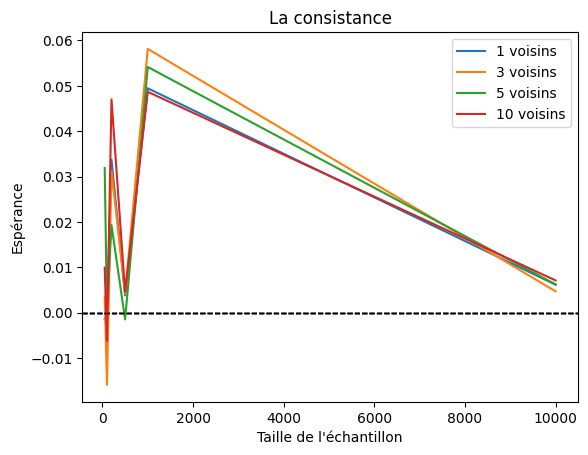

In [5]:
for k in nb_voisins:
    mean_errors = []

    for sample in nb_samples:
        errors = []

        for _ in range(nb_simulations):
            # génération des données
            X, Y_true = generate_data(sample)

            # régression par les k plus proches voisins
            knn_regressor = KNeighborsRegressor(n_neighbors=k)

            # entraînement du modèle
            knn_regressor.fit(X, Y_true)

            # estimateur
            c_chapeau = knn_regressor.predict(X)

            # l'erreur entre l'estimateur et la vraie fonction conditionnelle
            error = c_chapeau - c_etoile(X.flatten())
            errors.append(error)

        # l'espérance de l'erreur
        mean_error = np.mean(errors, axis=0)
        mean_errors.append(np.mean(mean_error))

    plt.plot(nb_samples, mean_errors, label=f'{k} voisins')
    plt.axhline(y=0, color="black", linestyle="--", linewidth=1)

plt.xlabel("Taille de l'échantillon")
plt.ylabel("Espérance")
plt.title("La consistance")
plt.legend()
plt.show()


Avec seulement 100 simulations on voit que pour n'importe quelle valeur de k,  l'espérance tend vers 0, ce qui prouve que notre classificateur $\hat{c}_n$ est consistant.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">

With only 100 simulations, we see that for any value of k, the expectation tends towards 0, which proves that our classifier $\hat{c}_n$ is consistent.


<div style="background-color: #F6BDD1; color:white; padding: 10px;">
    <h1>II.Arbres de décisions </h1>
</div>

<div style="background-color: #C7F3A5; padding: 10px;">
    <h>
On s'intéresse aux données <i>numbers_train.txt</i> et <i>numbers_test.txt</i>. Chaque fichier contient 500 images de dimension $16 \times 16$ et chaque image représente un caractère manuscrit (un chiffre entre 0 et 9). On a donc $Y \in {1, \dots,9}$ et $X = (X^1, \dots, X^{256}) \in \mathbb{R}^{256}$. Il s'agit d'images de niveaux de gris où chaque pixel prend une valeur entre 0 (noir) et 1 (blanc).
</h>
</div>    

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">

<div style="background-color: #C7F3A5; padding: 10px;">
    <h>
        We are interested in the data files <i>numbers_train.txt</i> and <i>numbers_test.txt</i>. Each file contains 500 images of size $16 \times 16$, and each image represents a handwritten character (a digit between 0 and 9). Therefore, $Y \in {1, \dots,9}$ et $X = (X^1, \dots, X^{256}) \in \mathbb{R}^{256}$. These are grayscale images where each pixel takes a value between 0 (black) and 1 (white).
    </h>
</div>    

### Préparation du data set

Nos datasets d'entraînement et de test contiennent chacun 500 lignes. Lorsque nous devrons ajuster un arbre de classification par élagage avec le critère $C_{\alpha}$, nous devrons utiliser le jeu de données dans son entièreté nous allons donc les concaténer ensemble. Nous allons également séparer notre variable à prédire *Y* des variables *X* pour chacun de nos datasets.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">

Our training and test datasets each contain 500 rows. When we need to fit a classification tree by pruning with the $C_{\alpha}$ criterion, we will use the entire dataset, so we will concatenate them together. We will also separate our target variable *Y* from the variables *X* for each of our datasets.


In [6]:
train_data_numbers = pd.read_csv("Datasets/numbers_train.txt", sep=" ")
test_data_numbers = pd.read_csv("Datasets/numbers_test.txt", sep=" ")

data_numbers = pd.concat([train_data_numbers, test_data_numbers], ignore_index=True)

# séparer la variables y des variables x
# entraînement
y_train_numbers = train_data_numbers["y"]
x_train_numbers = train_data_numbers.drop("y", axis = 1)

# test
y_test_numbers = test_data_numbers["y"]
x_test_numbers = test_data_numbers.drop("y", axis = 1)

# dataset complet
y_numbers = data_numbers["y"]
x_numbers = data_numbers.drop("y", axis = 1)

### Arbre de décision - Profondeur de l'arbre

Maintenant que nos données sont préparées, nous allons pouvoir passer à la réalisation de nos arbres de décisions. Nous allons, dans un premier temps,  ajustez par cross-validation un arbre de classification en faisant varier la profondeur de l'arbre.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">

Now that our data is prepared, we can move on to building our decision trees. First, we will adjust a classification tree by cross-validation, varying the depth of the tree.


#### Arbre de décision

Un arbre de décision est un modèle d'apprentissage supervisé. Il divise succesivement un ensemble de données en sous-groupes homogènes basés sur les caractéristiques des données. Chaque noeud de l'arbre représente une décision basée sur une caractéristique, chaque branche représente, elle, le résultat de la décision et pour finir chaque feuille représente une classe de sortie.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">
    A decision tree is a supervised learning model. It successively divides a dataset into homogeneous subgroups based on the features of the data. Each node of the tree represents a decision based on a feature, each branch represents the result of the decision, and finally, each leaf represents an output class.


#### Profondeur de l'arbre

La profondeur de l'arbre de décision est la longueur du chemin le plus long du noeud initial à une feuille. Elle mesure le nombre de niveaux ou de couches dans la structure de l'arbre. Une grande profondeur peut mieux s'adapter aux données mais elle peut conduire à un surajustement du modèle aux données.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">
The depth of a decision tree is the length of the longest path from the root node to a leaf. It measures the number of levels or layers in the tree structure. A large depth can better fit the data, but it can also lead to overfitting the model to the data.


In [7]:
# valeur à tester pour la profondeur
param_grid = {"max_depth": range(1,15)}

tree_classifier = DecisionTreeClassifier(random_state=123)

# GreadSearch par validation croisée
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5)

# entraînement du modèle
grid_search.fit(x_train_numbers, y_train_numbers)

# meilleur modèle
arbre_T1 = grid_search.best_estimator_
print("Meilleurs paramètres:", grid_search.best_params_)

# accuracy

accuracy1 = arbre_T1.score(x_test_numbers, y_test_numbers)
print("Précision sur l'ensemble de test:", accuracy1)

Meilleurs paramètres: {'max_depth': 8}
Précision sur l'ensemble de test: 0.702


Nous avons donc pour notre arbre de décisions $\hat{T_1}$ une profondeur de 8 et nous obtenons une précision de 0.702 pour ce modèle.
<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">
Therefore, for our decision tree $\hat{T_1}$, we have a depth of 8, and we achieve an accuracy of 0.702 for this model.


### 3 - Arbre de décision -  Elagage

Nous allons maintenant rèaliser un deuxième arbre $\hat{T_2}$. Cette fois-ci, nous allons ajuster notre arbre par cross-validation mais en utilisant la méthode par élagage avec le critère $C_{\alpha}$.
<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">

We will now build a second tree, $\hat{T_2}$. This time, we will adjust our tree using cross-validation, but with pruning based on the $C_{\alpha}$ criterion.


#### Elagage
L'élagage est une technique utilisée pour éviter le surajustement des arbres de décision. Cette technique consiste à supprimer certaines branches de l'arbre. Pour cela on ajoute une pénalisation : 
$$C_{\alpha}(T) = \sum_{i=1}^N (Y_i - T(X_i))^2 + \alpha |T|$$

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">
Pruning is a technique used to prevent overfitting in decision trees. This technique involves removing certain branches of the tree. To do this, a penalty is added:  
$$C_{\alpha}(T) = \sum_{i=1}^N (Y_i - T(X_i))^2 + \alpha |T|$$  

In [8]:
tree_classifier = DecisionTreeClassifier(random_state=123)

path = tree_classifier.cost_complexity_pruning_path(x_numbers,y_numbers)
alphas, impurities = path.ccp_alphas, path.impurities

# grille des hyperparamètres à rechercher
param_grid = {"ccp_alpha": alphas}

# recheche par grille
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5)
grid_search.fit(x_train_numbers, y_train_numbers)

# obtenir le meilleur modèle (avec la meilleure valeur de ccp_alpha)
arbre_T2 = grid_search.best_estimator_


best_alpha = arbre_T2.ccp_alpha
print("Meilleure valeur de ccp_alpha:", best_alpha)

accuracy2 = arbre_T2.score(x_test_numbers, y_test_numbers)
print("Précision sur l'ensemble de test avec le meilleur arbre:", accuracy2)


Meilleure valeur de ccp_alpha: 0.004961636828644502
Précision sur l'ensemble de test avec le meilleur arbre: 0.682


Pour notre arbre $\hat{T_2}$ nous avons comme meilleure valeur pour $C_{alpha}$ 0.00496 et nous avons une précision de 0.682 pour ce modèle.
<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">
For our tree $\hat{T_2}$, the best value for $C_{\alpha}$ is 0.00496, and we achieve an accuracy of 0.682 for this model.


### Forêts - Ajustement du nombre d'arbres

#### Forêt aléatoire
Cette technique combine plusieurs arbres de décision. Chaque arbre est construit sur un sous-ensemble aléatoire des données. Cette technique permet de réduire le surajustement, chaque arbre apprend différemment et combiner les résultats permet une meilleure généralisation des résultats.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">
This technique combines several decision trees. Each tree is built on a random subset of the data. This approach helps reduce overfitting, as each tree learns differently, and combining the results leads to better generalization of the outcomes.


#### Nombre d'arbres
Il s'agit d'un hyperparamètre d'une forêt aléatoire. Il détermine le nombre d'arbres de décision dans notre forêt. Un nombre d'arbre trop important peut rendre le calcul bien plus long et la progression serait moindre, il est important de trouver le nombre optimal d'arbre à fin d'éviter ce problème.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">
This is a hyperparameter of a random forest. It determines the number of decision trees in our forest. A too-large number of trees can make the computation much longer, and the improvement would be minimal. It is important to find the optimal number of trees in order to avoid this issue.


Nous allons donc, maintenant, réaliser un troisième arbre $\hat{F}$ en optimisant par cross-validation le nombre d'arbres.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">
We will now build a third tree, $\hat{F}$, by optimizing the number of trees using cross-validation.


In [9]:
# définissez la grille des hyperparamètres à rechercher
param_grid = {"n_estimators": [50, 100, 150]}

forest_classifier = RandomForestClassifier(random_state=123)

# recherche par grille
grid_search = GridSearchCV(forest_classifier, param_grid, cv=5)
grid_search.fit(x_train_numbers, y_train_numbers)

best_n = grid_search.best_params_
F = grid_search.best_estimator_


# affichez les meilleurs hyperparamètres
print("Meilleurs hyperparamètres:", best_n)

# évaluez la précision sur l'ensemble de test
accuracy3 = F.score(x_test_numbers, y_test_numbers)
print("Précision sur l'ensemble de test:", accuracy3)


Meilleurs hyperparamètres: {'n_estimators': 100}
Précision sur l'ensemble de test: 0.858


Nous avons donc pour notre forêt $\hat{F}$  une précision de 0.864. Le nombre d'arbre optimal pour notre modèle est 100.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">
        Therefore, for our forest $\hat{F}$, we achieve an accuracy of 0.864. The optimal number of trees for our model is 100.


### Approche des plus proches voisins 

Il s'agit d'une méthode d'apprentissage supervisé. Elle est basée sur le principe que des points similaires devraient avoir des étiquettes similaires. 

Il faut choisir le nombre de voisins k à considérer lors de la prédiction. Un k trop petit peut conduire à une sensibilité au bruit, alors qu'un k trop grand peut amener une trop forte influence des caractéristiques non représentatives.

Nous allons maintenant réaliser notre modèle d'apprentissage.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">
This is a supervised learning method. It is based on the principle that similar points should have similar labels.  

The number of neighbors, $k$, must be chosen when making a prediction. A too-small $k$ can lead to sensitivity to noise, while a too-large $k$ may cause excessive influence from non-representative features.  

We will now build our learning model.

In [10]:
# plage de valeurs pour k
param_grid = {"n_neighbors": np.arange(1, 100)}

knn = KNeighborsClassifier()

# GridSearch
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy")
grid_search.fit(x_train_numbers, y_train_numbers)

# k optimal
best_k = grid_search.best_params_["n_neighbors"]
print("Meilleur nombre de voisins (k):", best_k)

# entraîner le modèle final avec la meilleure valeur de k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train_numbers, y_train_numbers)

accuracy4 = knn.score(x_test_numbers, y_test_numbers)
print("Précision sur l'ensemble de test:", accuracy4)

Meilleur nombre de voisins (k): 1
Précision sur l'ensemble de test: 0.882


Pour notre modèle *K-NN* le meilleur nombre de voisin est 1. Nous obtenons pour ce modèle une précision de 0.882.
<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">
For our *K-NN* model, the optimal number of neighbors is 1. This model achieves an accuracy of 0.882.


### Conclusion

In [11]:
summary = pd.DataFrame({"Modèle": ["Arbre de décision 1", "Arbre de décision 2", "Random Forest", "k-NN"],
    "Accuracy": [accuracy1, accuracy2, accuracy3, accuracy4]})

display(summary)

,Modèle,Accuracy
0,Arbre de décision 1,0.702
1,Arbre de décision 2,0.682
2,Random Forest,0.858
3,k-NN,0.882


Le modèle ayant la meilleure précision de prédiction est le modèle *k-NN* avec une précision de 88,2%, il est suivi de près par le modèle *Random Forest* qui lui a une précision de 86,4%. En revanche, nos arbres de décisions se retrouvent, eux, bien derrière en terme de performance. En effet, le modèle d'arbre de décision avec ajustement de la profondeur a une précision de 70,2%, soit 18% de moins que le modèle k-NN. Et enfin, en dernière position nous retrouvons le modèle d'arbre de décision avec ajustement par élagage, qui a une précision de seulement 68,2%.

<hr style="border: 1px solid #000; margin-top: 5px; margin-bottom: 5px;">

The model with the best prediction accuracy is the *k-NN* model, with an accuracy of 88.2%. It is closely followed by the *Random Forest* model, which has an accuracy of 86.4%.  

However, our decision trees fall significantly behind in terms of performance. The decision tree model with depth adjustment has an accuracy of 70.2%, which is 18% lower than the *k-NN* model. Finally, in last place, we have the decision tree model with pruning adjustment, which has an accuracy of only 68.2%.